#### Домашнее задание "Временные ряды, общая теория" (Знакомство с временными рядами)  

Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# загружаем данные
daily_total_female_births_in_cal = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Временные ряды\Знакомство с временными рядами\Series\daily-total-female-births-in-cal.csv')
international_airline_passengers = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Временные ряды\Знакомство с временными рядами\Series\international-airline-passengers.csv')
mean_monthly_air_temperature_deg = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Временные ряды\Знакомство с временными рядами\Series\mean-monthly-air-temperature-deg.csv')
monthly_boston_armed_robberies_j = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Временные ряды\Знакомство с временными рядами\Series\monthly-boston-armed-robberies-j.csv')
monthly_sales_of_company_x_jan_6 = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Временные ряды\Знакомство с временными рядами\Series\monthly-sales-of-company-x-jan-6.csv')
weekly_closings_of_the_dowjones_ = pd.read_csv(r'C:\Users\Urmas\Desktop\Digital\НЕТОЛОГИЯ. ПРОФЕССИЯ DATA SCIENTIST\Временные ряды\Знакомство с временными рядами\Series\weekly-closings-of-the-dowjones-.csv')  

In [3]:
# сводим все временные ряды в один словарь
all_series = {
    'Daily_total_female_births_in_cal': daily_total_female_births_in_cal['Count'],
    'International_airline_passengers': international_airline_passengers['Count'],
    'Mean_monthly_air_temperature_deg': mean_monthly_air_temperature_deg['Deg'],
    'Monthly_boston_armed_robberies_j': monthly_boston_armed_robberies_j['Count'],
    'Monthly_sales_of_company_x_jan_6': monthly_sales_of_company_x_jan_6['Count'],
    'Weekly_closings_of_the_dowjones_': weekly_closings_of_the_dowjones_['Close']    
}

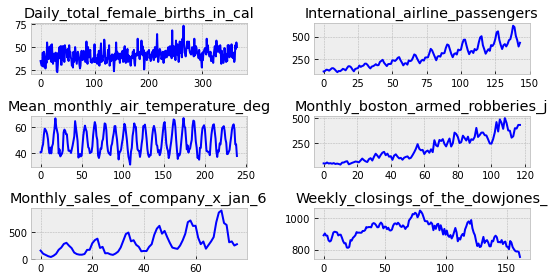

In [4]:
# отобразим для визуализации данных простые графики
with plt.style.context('bmh'):
    plt.figure(figsize=(8, 4))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [5]:
# посмотрим дополнительно на каррелограммы, тест Дики-Фуллера (о стационарности ВР)
# общая функция отрисовки

def test_stationarity(timeseries):    # сам тест Дики-Фуллера
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def tsplot(y, lags=None, figsize=(10, 4), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Daily_total_female_births_in_cal
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64



<Figure size 720x288 with 0 Axes>

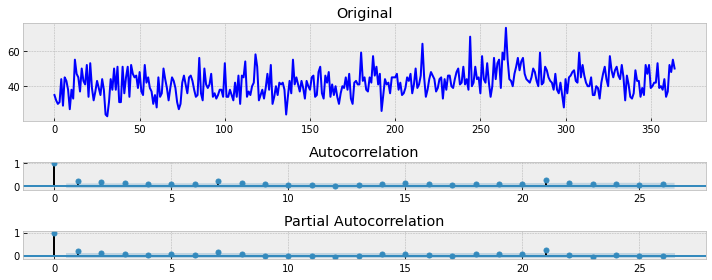

International_airline_passengers
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64



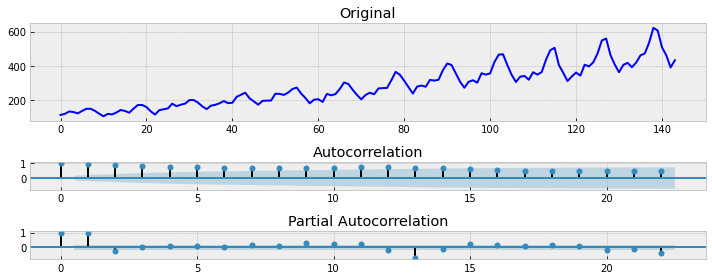

Mean_monthly_air_temperature_deg
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64



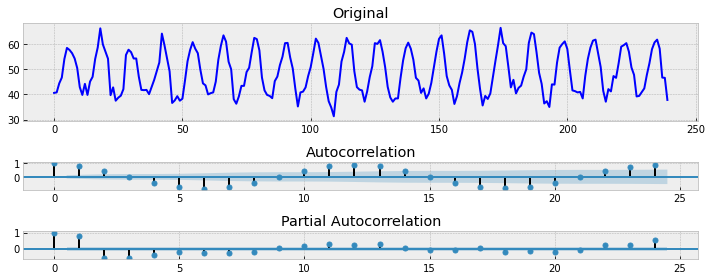

Monthly_boston_armed_robberies_j
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64



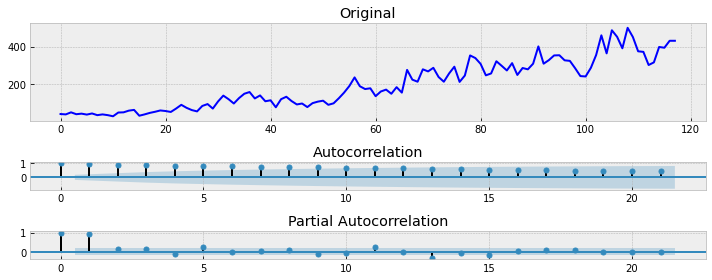

Monthly_sales_of_company_x_jan_6
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64



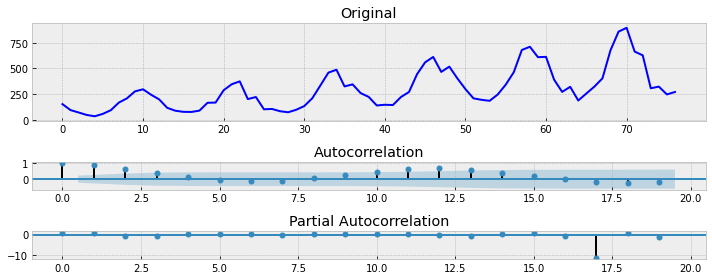

Weekly_closings_of_the_dowjones_
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64



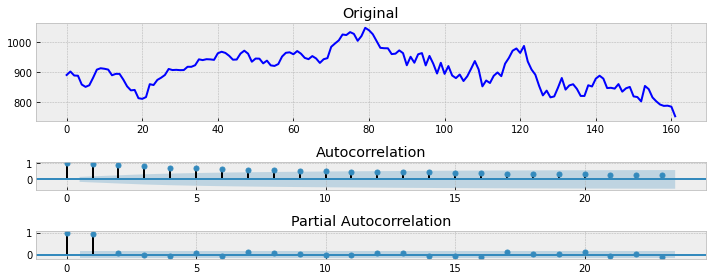

<Figure size 432x288 with 0 Axes>

In [6]:
#for y in all_series.values():   (или так)
    #tsplot(y)

with plt.style.context('bmh'):
    plt.figure(figsize=(10, 4))
    layout = (4, 1)
    for x, y in all_series.items():
        print(x)
        tsplot(y)
        print()
        plt.show()
    plt.tight_layout()

In [7]:
# мои выводы

for i, j in enumerate(all_series.keys()):
    print(j)
    if i==0:
        print('ВР похож на статистический ряд, тест Дики-Фуллера дает низкий p-value(можно отвергнуть H0 гипотезу, что ВР нестационарен), АК и ПК лежат в зоне ДИ, есть подозрение на слабую сезонность с лагом, равным 7')
        print()
    if i==1:
        print('ВР имеет увеличение дисперсии, тренд, сезонность; тест Дики-Фуллера дает высокий p-value(нельзя отвергнуть H0 гипотезу, что ВР нестационарен); АК и ПК выходят из зоны ДИ, есть подозрение на сезонность с третьего элемента со сдвигом 10')
        print()
    if i==2:
        print('ВР, похоже, имеет сезонность со сдвигом 12, хотя тест Дики-Фуллера дает низкий p-value(можно отвергнуть H0 гипотезу, что ВР нестационарен); АК и ПК выходят из зоны ДИ с явной зависимостью от предыдущего значения')
        print()
    if i==3:
        print('ВР имеет разную дисперсию, тренд, на сезонность нужно дополнительно проверить, АК и ПК выходят из зоны ДИ; тест Дики-Фуллера дает высокий p-value(нельзя отвергнуть H0 гипотезу, что ВР нестационарен)')
        print()
    if i==4:
        print('ВР имеет увеличение дисперсии, небольшой тренд и явную сезонность с лагом 12 и к нему 4; тест Дики-Фуллера дает высокий p-value(нельзя отвергнуть H0 гипотезу, что ВР нестационарен)')
        print()
    if i==5:
        print('ВР хорошо бы проверить на большем интервале на сезонность, внутри имеющегося диапазона видим меняющийся тренд, изменение дисперсии, нужно проверить на сезонность, возможно смещение 5; тест Дики-Фуллера дает высокий p-value(нельзя отвергнуть H0 гипотезу, что ВР нестационарен)')
        print()

Daily_total_female_births_in_cal
ВР похож на статистический ряд, тест Дики-Фуллера дает низкий p-value(можно отвергнуть H0 гипотезу, что ВР нестационарен), АК и ПК лежат в зоне ДИ, есть подозрение на слабую сезонность с лагом, равным 7

International_airline_passengers
ВР имеет увеличение дисперсии, тренд, сезонность; тест Дики-Фуллера дает высокий p-value(нельзя отвергнуть H0 гипотезу, что ВР нестационарен); АК и ПК выходят из зоны ДИ, есть подозрение на сезонность с третьего элемента со сдвигом 10

Mean_monthly_air_temperature_deg
ВР, похоже, имеет сезонность со сдвигом 12, хотя тест Дики-Фуллера дает низкий p-value(можно отвергнуть H0 гипотезу, что ВР нестационарен); АК и ПК выходят из зоны ДИ с явной зависимостью от предыдущего значения

Monthly_boston_armed_robberies_j
ВР имеет разную дисперсию, тренд, на сезонность нужно дополнительно проверить, АК и ПК выходят из зоны ДИ; тест Дики-Фуллера дает высокий p-value(нельзя отвергнуть H0 гипотезу, что ВР нестационарен)

Monthly_sales_o

In [8]:
# ищем сезонность
# общая функция
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(10, 6))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')    

Daily_total_female_births_in_cal


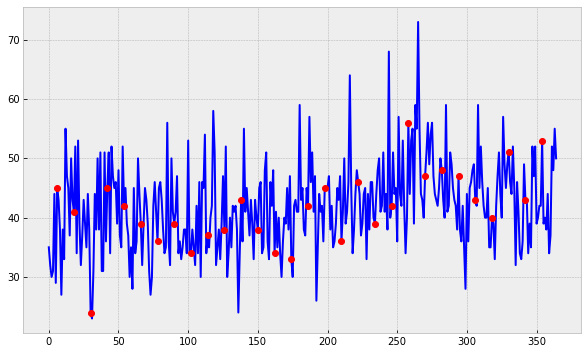

International_airline_passengers


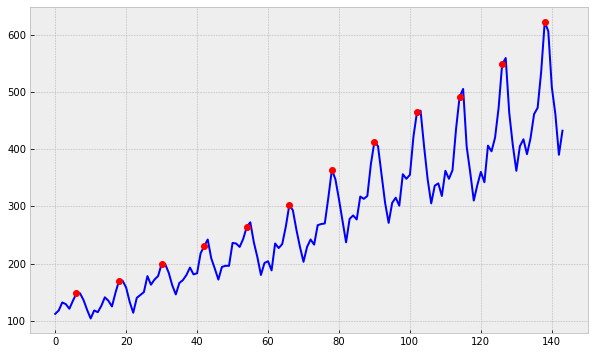

Mean_monthly_air_temperature_deg


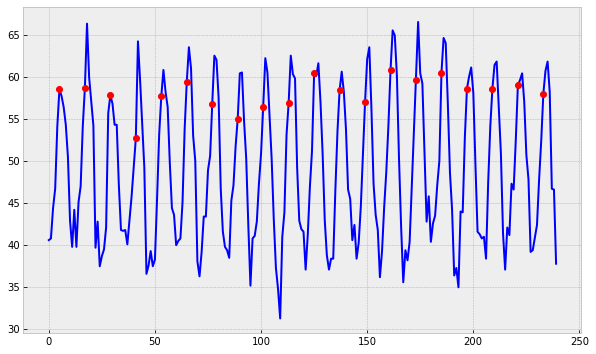

Monthly_boston_armed_robberies_j


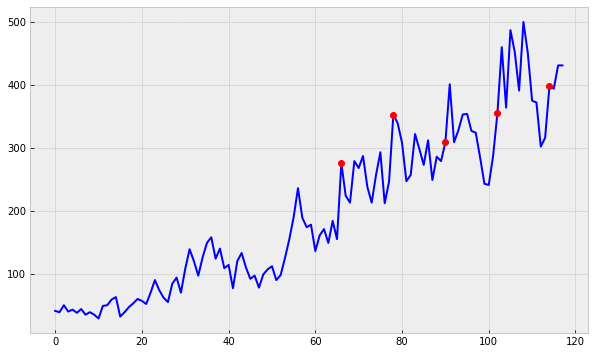

Monthly_sales_of_company_x_jan_6


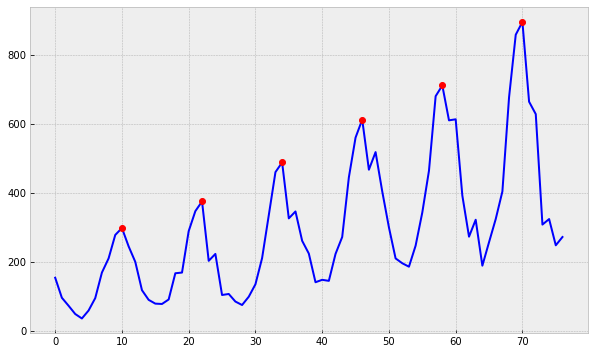

Weekly_closings_of_the_dowjones_


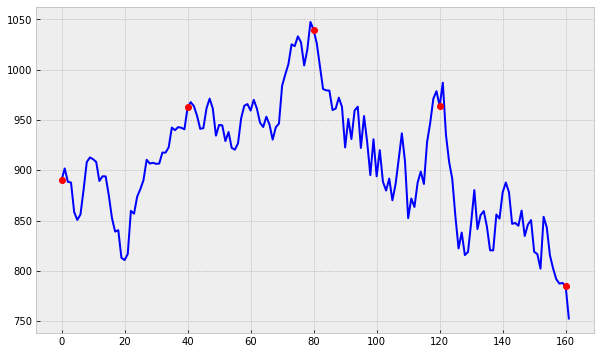

In [9]:
for x, ts in all_series.items():
    print(x)
    if x=='Daily_total_female_births_in_cal':   # кажется, ВР имеет пару уровней сезонов, трудно подобрать
        plot_ts_and_points(ts, 6, 12)
    if x=='International_airline_passengers':   # подобрали )
        plot_ts_and_points(ts, 6, 12)
    if x=='Mean_monthly_air_temperature_deg':
        plot_ts_and_points(ts, 5, 12)
    if x=='Monthly_boston_armed_robberies_j':   # трудно подобрать вручную, много шума
        plot_ts_and_points(ts, 66, 12)
    if x=='Monthly_sales_of_company_x_jan_6':   # подобрали )
        plot_ts_and_points(ts, 10, 12)
    if x=='Weekly_closings_of_the_dowjones_':   # подобрали )
        plot_ts_and_points(ts, 0, 40)
    plt.show()
    

Daily_total_female_births_in_cal


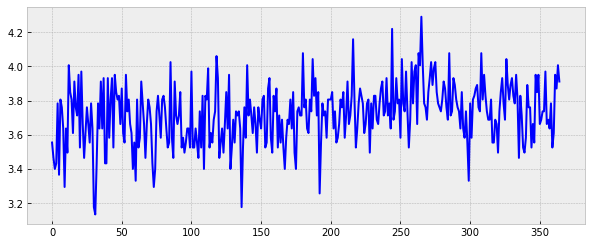

International_airline_passengers


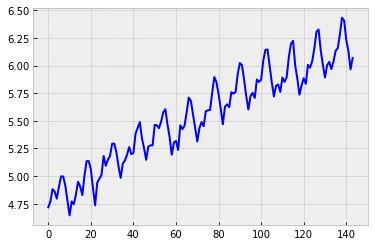

Mean_monthly_air_temperature_deg


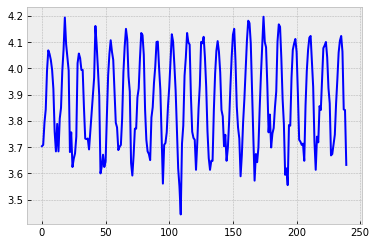

Monthly_boston_armed_robberies_j


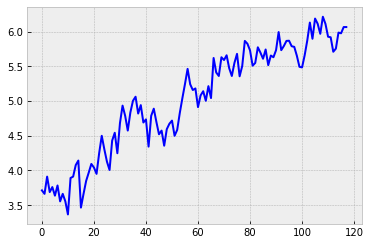

Monthly_sales_of_company_x_jan_6


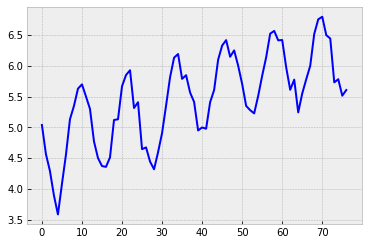

Weekly_closings_of_the_dowjones_


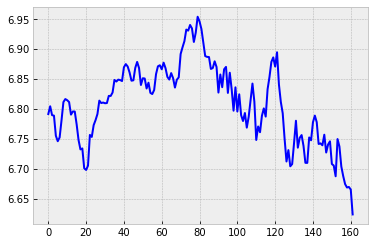

In [10]:
# нормализуем дисперсию boxcox, выведем только графики

with plt.style.context('bmh'):
    plt.figure(figsize=(10, 4))
    for x, y in all_series.items():
        print(x)
        y=boxcox(y, 0)
        plt.plot(y, color='blue')
        plt.show()

In [11]:
# сравним тест Дики-Фуллера после преобразований (нормализация дисперсии boxcox)

for x, y in all_series.items():
    print(x)
    dftest1 = adfuller(y, autolag='AIC')
    dfoutput1 = pd.Series(dftest1[1], index=['p-value'])
    for [key, value] in dftest1[4].items():
        dfoutput1['Critical Value (%s)' % key] = value
    print(dfoutput1['p-value'])
    y = boxcox(y, 0)
    dftest2 = adfuller(y, autolag='AIC')
    dfoutput2 = pd.Series(dftest2[1], index=['p-value'])
    for [key, value] in dftest2[4].items():
        dfoutput2['Critical Value (%s)' % key] = value
    print(dfoutput2['p-value'])  
    if dfoutput2['p-value'] < dfoutput1['p-value']:
        print('улучшение')
    if dfoutput2['p-value'] == dfoutput1['p-value']:
        print('без изменений')
    if dfoutput2['p-value'] > dfoutput1['p-value']:
        print('ухудшение')
    print()

Daily_total_female_births_in_cal
5.2434129901498554e-05
0.00035889654490255384
ухудшение

International_airline_passengers
0.991880243437641
0.4223667747703902
улучшение

Mean_monthly_air_temperature_deg
0.016989030222608642
0.0033325562525332907
улучшение

Monthly_boston_armed_robberies_j
0.9942775638057231
0.28083250354255357
улучшение

Monthly_sales_of_company_x_jan_6
0.9888894205170053
0.7853102124849105
улучшение

Weekly_closings_of_the_dowjones_
0.6224548515589717
0.6691194827577223
ухудшение



In [12]:
# уберем тренды дифференцированием, проверим на тесте Дики-Фуллера

for x, y in all_series.items():
    print(x)
    dftest1 = adfuller(y, autolag='AIC')
    dfoutput1 = pd.Series(dftest1[1], index=['p-value'])
    for [key, value] in dftest1[4].items():
        dfoutput1['Critical Value (%s)' % key] = value
    print(dfoutput1['p-value'])
    y = np.diff(y, 1)                                       # или y = y[1:] - y[:-1]
    dftest2 = adfuller(y, autolag='AIC')
    dfoutput2 = pd.Series(dftest2[1], index=['p-value'])
    for [key, value] in dftest2[4].items():
        dfoutput2['Critical Value (%s)' % key] = value
    print(dfoutput2['p-value'])  
    if dfoutput2['p-value'] < dfoutput1['p-value']:
        print('улучшение')
    if dfoutput2['p-value'] == dfoutput1['p-value']:
        print('без изменений')
    if dfoutput2['p-value'] > dfoutput1['p-value']:
        print('ухудшение')
    print()

Daily_total_female_births_in_cal
5.2434129901498554e-05
1.5472400091969005e-23
улучшение

International_airline_passengers
0.991880243437641
0.054213290283826474
улучшение

Mean_monthly_air_temperature_deg
0.016989030222608642
9.157883248646783e-23
улучшение

Monthly_boston_armed_robberies_j
0.9942775638057231
6.450795412686704e-11
улучшение

Monthly_sales_of_company_x_jan_6
0.9888894205170053
0.09550925078558736
улучшение

Weekly_closings_of_the_dowjones_
0.6224548515589717
2.4075864037417794e-24
улучшение



In [13]:
# уберем сезонность дифференцированием, проверим на тесте Дики-Фуллера

for x, y in all_series.items():
    print(x)
    dftest1 = adfuller(y, autolag='AIC')
    dfoutput1 = pd.Series(dftest1[1], index=['p-value'])
    for [key, value] in dftest1[4].items():
        dfoutput1['Critical Value (%s)' % key] = value
    print(dfoutput1['p-value'])
    
    y = np.diff(y, 1)   # уберем тренд сначала
    if x=='Daily_total_female_births_in_cal':   
        y = y[12:] - y[:-12]
    if x=='International_airline_passengers':   
        y = y[12:] - y[:-12]
    if x=='Mean_monthly_air_temperature_deg':
        y = y[12:] - y[:-12]
    if x=='Monthly_boston_armed_robberies_j':  
        y = y[12:] - y[:-12]
    if x=='Monthly_sales_of_company_x_jan_6':  
        y = y[12:] - y[:-12]
    if x=='Weekly_closings_of_the_dowjones_':  
        y = y[13:] - y[:-13]
        
    dftest2 = adfuller(y, autolag='AIC')
    dfoutput2 = pd.Series(dftest2[1], index=['p-value'])
    for [key, value] in dftest2[4].items():
        dfoutput2['Critical Value (%s)' % key] = value
    print(dfoutput2['p-value'])  
    if dfoutput2['p-value'] < dfoutput1['p-value']:
        print('улучшение')
    if dfoutput2['p-value'] == dfoutput1['p-value']:
        print('без изменений')
    if dfoutput2['p-value'] > dfoutput1['p-value']:
        print('ухудшение')
    print()

Daily_total_female_births_in_cal
5.2434129901498554e-05
1.2897816546125919e-14
улучшение

International_airline_passengers
0.991880243437641
1.856511600123444e-28
улучшение

Mean_monthly_air_temperature_deg
0.016989030222608642
5.246599900598383e-12
улучшение

Monthly_boston_armed_robberies_j
0.9942775638057231
0.00012069497709695876
улучшение

Monthly_sales_of_company_x_jan_6
0.9888894205170053
0.08633171234102177
улучшение

Weekly_closings_of_the_dowjones_
0.6224548515589717
0.00037805485649780064
улучшение



Daily_total_female_births_in_cal
5.2434129901498554e-05
1.2897816546125919e-14
улучшение 100.0 %
p-value < 0.05


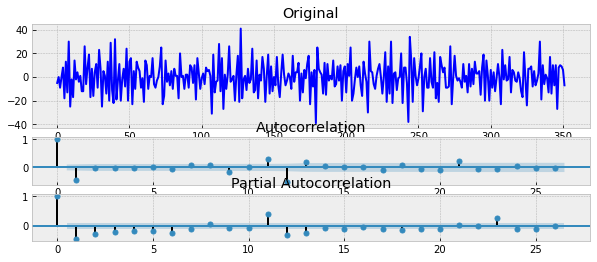


International_airline_passengers
0.991880243437641
0.00024859123113841515
улучшение 100.0 %
p-value < 0.05


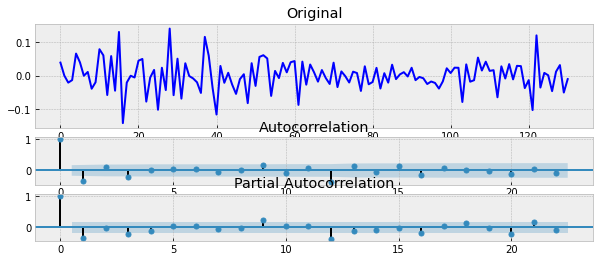


Mean_monthly_air_temperature_deg
0.016989030222608642
2.3611635224728792e-12
улучшение 100.0 %
p-value < 0.05


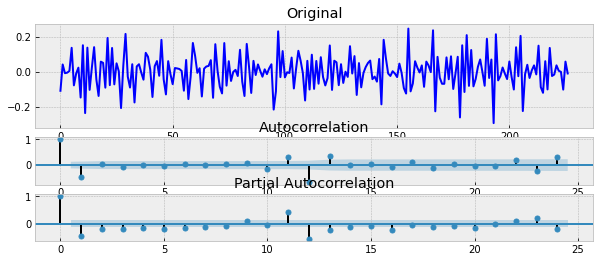


Monthly_boston_armed_robberies_j
0.9942775638057231
0.0005791258821324342
улучшение 100.0 %
p-value < 0.05


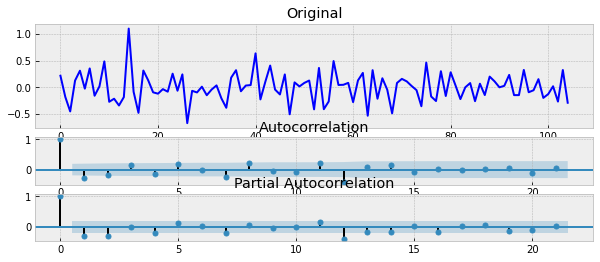


Monthly_sales_of_company_x_jan_6
0.9888894205170053
0.002444917130466327
улучшение 100.0 %
p-value < 0.05


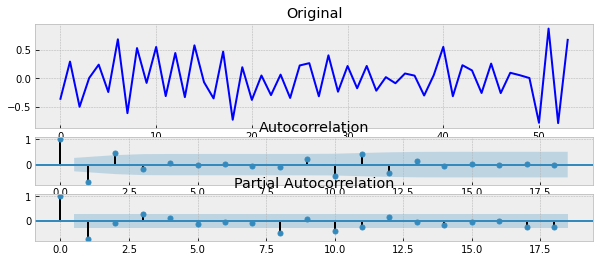


Weekly_closings_of_the_dowjones_
0.6224548515589717
0.012202839404773921
улучшение 98.0 %
p-value < 0.05


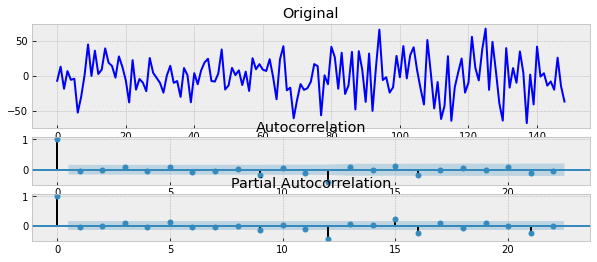

In [26]:
# "собираем" преобразования, пытаемся сделать ВР стационарным

for x, y in all_series.items():
    print(x)
    dftest1 = adfuller(y, autolag='AIC')
    dfoutput1 = pd.Series(dftest1[1], index=['p-value'])
    for [key, value] in dftest1[4].items():
        dfoutput1['Critical Value (%s)' % key] = value
    print(dfoutput1['p-value'])
    
    if x=='Daily_total_female_births_in_cal': 
        y = np.diff(y, 1)
        y = y[12:] - y[:-12]
    if x=='International_airline_passengers': 
        y = boxcox(y, 0)
        y = np.diff(y, 1)
        y = y[12:] - y[:-12]
    if x=='Mean_monthly_air_temperature_deg':
        y = boxcox(y, 0)
        y = np.diff(y, 1)
        y = y[12:] - y[:-12]
    if x=='Monthly_boston_armed_robberies_j':  
        y = boxcox(y, 0)
        y = np.diff(y, 1)
        y = y[12:] - y[:-12]
    if x=='Monthly_sales_of_company_x_jan_6': 
        y = boxcox(y, 0)
        y = np.diff(y, 1)
        y = y[12:] - y[:-12]
        y = y[10:] - y[:-10]
    if x=='Weekly_closings_of_the_dowjones_':
        y = np.diff(y, 1)
        y = y[12:] - y[:-12]
        
    dftest2 = adfuller(y, autolag='AIC')
    dfoutput2 = pd.Series(dftest2[1], index=['p-value'])
    for [key, value] in dftest2[4].items():
        dfoutput2['Critical Value (%s)' % key] = value
    print(dfoutput2['p-value'])  
    if dfoutput2['p-value'] < dfoutput1['p-value']:
        print('улучшение', -round(((dfoutput2['p-value']/dfoutput1['p-value'])-1)*100, 0), '%')
    if dfoutput2['p-value'] == dfoutput1['p-value']:
        print('без изменений', -round(((dfoutput2['p-value']/dfoutput1['p-value'])-1)*100, 0), '%')
    if dfoutput2['p-value'] > dfoutput1['p-value']:
        print('ухудшение', -round(((dfoutput2['p-value']/dfoutput1['p-value'])-1)*100, 0), '%')
    if dfoutput2['p-value'] < 0.05:
        print('p-value < 0.05')
        
    with plt.style.context('bmh'):
        plt.figure(figsize=(10, 4))
        layout = (4, 1)
        
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        pd.Series(y).plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=None, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=None, ax=pacf_ax, alpha=0.05)
        plt.show()
    print()